# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [67]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [68]:
# importing request to use and get umage_pediction data
import requests

requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

image_df =pd.read_table('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

image_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# using the code provided by Udacity to get an additional json data from the Twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [69]:
# importing json lib
import json
# saving required info to the dataframe
tweet_df = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        tweet_df = tweet_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
tweet_df = tweet_df.reset_index(drop = True)
# To show the last five columns
tweet_df.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data
In this section, I assessed the data to know how to tidy it where necessary



In [70]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [71]:
# To view total no of columns and rwos
archive_df.shape

(2356, 17)

In [72]:
# To view all the columns and datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [73]:
# To get the total no of duplicates
archive_df.duplicated().sum()

0

In [74]:
# To get the total no of null rows in each column
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [77]:
# To describe the data 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [78]:
 # To get the value counts of source 
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [79]:
 # To get the value counts of doggo 
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [80]:
 # To get the value counts of puppo 
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [81]:
 # To get the value counts of floofer 
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [82]:
 # To get the value counts of pupper 
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [83]:
# To view the first five rows
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [84]:
# to view the total no of columns and rows
image_df.shape

(2075, 12)

In [85]:
# to view the columns and datatypes
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
# to view the no of duplicates
image_df.duplicated().sum()

0

In [87]:
# to descibe the data
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [88]:
# to view the columns and dataypes
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [89]:
# To describe the data
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,726935089318363137,3652,0
freq,1,5,179


### Quality issues
1. In archive_df; in_reply_to_status_id, in_reply_to_user_id have wrong data type. They should be an object instead of a float
 
2. In archive_df, retweeted_status_timestamp datatype should be datetime not float 

3. In archive_df; under name column, there invalid names such as a, the and so on. They should be replaced with NaN

4. In archive_df; some of the rating numerator is greater than the rating denominator which is not supposed to be so 

5. In archive_df; information on source column is too long 

6. In image_df; column headers are not descriptive 

7. In tweet_df; tweet_id, retweet_count, and favorite_count dataypes should be an integer not an object

8. In image_df, the naming pattern p1, p2 and p3 columns are inconsistent as some start with capital letters while others start with small letter


### Tidiness issues
1. In archive_df; doggo, floofer, pupper and puppo should be merged into one column and categorized as Dog Breed

2. In archive_df, column in_reply_to_status_id, in_reply_to_user_id, source, expanded_urls, retweeted_status_id	retweeted_status_user_id,retweeted_status_timestamp	shoould be dropped while column jpg_url should be dropped in image_df. Also, tweet_df and image_df should be merged into archive_df dataframe

## Cleaning Data
In this section,  I will clean **all** of the issues you documented while assessing. 


In [90]:
# Making copies of original pieces of data
df1 = archive_df.copy()
df2 = image_df.copy()
df3 = tweet_df.copy()
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #1:

#### Define: Changing datatypes of  in_reply_to_status_id, in_reply_to_user_id from float to object In archive_df;
 

#### Code

In [91]:
# Changing datatypes
df1['in_reply_to_status_id'] = df1['in_reply_to_status_id'].astype(object)
df1['in_reply_to_user_id']= df1['in_reply_to_user_id'].astype(object)

#### Test

In [92]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue #2:

#### Define: Convert timestamp and retweeted_status_timestamp in df1 from object to datatime

#### Code

In [93]:
# changing datatypes
df1.timestamp = pd.to_datetime(df1.timestamp)
df1.retweeted_status_timestamp = pd.to_datetime(df1.retweeted_status_timestamp)

#### Test

In [94]:
df1.dtypes

tweet_id                               int64
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

## Issue 3:

### Define: Replacing invalid names with  NaN  in df1.

### Code

In [95]:
# To replace lower case with NaN
a = df1.name.str.islower()
column_name = 'name'
df1.loc[a, column_name] = np.nan
df1.name.replace("None", np.nan, inplace = True)  


### Test

In [96]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Issue 4

### Define: The irregularities in numerator rating will be ignored according to the project requiremnet and instruction 

## Issue 5

### Define: Extracting the source name only using regex

#### Code

In [97]:
# importing regex 
import re
# counts of source
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [98]:
# replacing the tags with actual source using regex
df1.source = df1.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

#counts of source after extraction
df1.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

## Issue 6

### Define: To make the column headers descriptive in image df

### Code

In [99]:
# To view the first 2 rows
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [100]:
# To rename columns
df2 =df2.rename(columns= {'img_num':'image_number', 
                         'p1': 'prediction1', 
                         'p1_conf':'prediction1_confidence',
                         'p1_dog':'prediction1_dog', 
                         'p2': 'prediction2',
                         'p2_conf':'prediction3_confidence',
                         'p2_dog':'prediction2_dog',
                         'p3':'prediction3',
                         'p3_conf':'prediction3_confidence',
                         'p3_dog':'prediction3_dog'})

### Test

In [101]:
# To view the columns descriptions after renaming
df2.head(0)

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction3_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog


## Issue 7

### Define: Changing the datatypes of tweet_id, retweet_count, and favorite_count to integer in Image DataFrame

### Code

In [102]:
# To chnage datatypes
df3.tweet_id = df3.tweet_id.astype(int)
df3.retweet_count = df3.retweet_count.astype(int)
df3.favorite_count= df3.favorite_count.astype(int)

### Test

In [103]:
# to view datatypes
df3.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [104]:
# to view the total no of null values
df3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Issue 8

### Define: Merging doggo, floofer, pupper and puppo  into one column and categorized as Dog Breed Stage in archive dataframe

### Code

In [105]:
# Firstly we replace None with empty space for doggo, floofer, pupper and puppo
df1.doggo.replace('None','',inplace = True)
df1.floofer.replace('None','',inplace = True)
df1.pupper.replace('None','',inplace = True)
df1.puppo.replace('None','',inplace = True)

In [106]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


In [107]:
# Creating a new column dog_stage and merging doggo, floofer, pupper and puppo columns
df1['dog_stage'] = df1.doggo + df1.floofer + df1.pupper + df1.puppo

In [108]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52,Twitter for iPhone,This is Brudge. He's a Doberdog. Going to be h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,,,,,
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05,Twitter for iPhone,Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/686749460...,8,10,NaN,,,,,
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03,Twitter for iPhone,Breathtaking scene. A father taking care of hi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675888385...,10,10,NaN,,,,,
613,796865951799083009,NaN,NaN,2016-11-11 00:03:42,Twitter for iPhone,This is Tyr. He's just checking on you. Nifty ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,,,,,
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55,Twitter for iPhone,This is Chloe. She fell asleep at the wheel. A...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/817056546...,11,10,Chloe,,,,,


In [109]:
# To view Value counts for dog stage
df1.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [110]:
#To seperate doggopupper,doggopuppo, doggofloofer
df1.loc[df1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df1.loc[df1.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df1.loc[df1.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer' 

In [111]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


In [112]:
# To replace empty rows to NaN values
df1.loc[df1.dog_stage == '', 'dog_stage'] = np.nan

In [113]:
# To drop the doggo,floofer,pupper,puppo columns
df1.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [114]:
# count of dog_stage
df1.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [115]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


## Issue 9

### Define: Drop  in_reply_to_status_id, in_reply_to_user_id,  retweeted_status_id, retweeted_status_user_id, expanded_url, retweeted_status_timestamp columns from archive dataframe and  jpg_url  and image_number columns  should be dropped in image_df. 
         

### Code

In [116]:
# to drop columns
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'retweeted_status_id',
         'retweeted_status_user_id','retweeted_status_timestamp']
df1.drop(columns_to_drop, axis = 1, inplace = True)

### Test

In [117]:
# to view column descriptions only
df1.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


In [118]:
# to view column descriptions only
df2.head(0)

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction3_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog


In [119]:
#To drop columns
columns_to_drop = ['jpg_url','image_number']
df2.drop(columns_to_drop, axis = 1, inplace = True)
#df2.drop('image_number', axis = 1, inplace = True)

### Test

In [120]:
# to view column descriptions only
df2.head(0)

,tweet_id,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction3_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog


## Issue 10

### Define: To merge the image and tweet data frame into archive datafram to form a master dataframe

#### Code

In [121]:
# To merge the archive and image dataframe known as master_df
master_df = pd.merge(df1, df2, on = 'tweet_id', how = 'left')

In [122]:
# To merge the tweet dataframe with master_df
master_df = pd.merge(master_df, df3, on = 'tweet_id', how = 'left')

### Test

In [123]:
# To view the column heading
master_df.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction3_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count


In [124]:
# To view the new info on master_df
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                  2356 non-null int64
timestamp                 2356 non-null datetime64[ns]
source                    2356 non-null object
text                      2356 non-null object
rating_numerator          2356 non-null int64
rating_denominator        2356 non-null int64
name                      1502 non-null object
dog_stage                 380 non-null object
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null object
prediction2               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction2_dog           2075 non-null object
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null object
retweet_count             2354 non-null float64
favorite_count            2354 non-null

In [125]:
# To check for null values
master_df.isnull().sum()

tweet_id                     0
timestamp                    0
source                       0
text                         0
rating_numerator             0
rating_denominator           0
name                       854
dog_stage                 1976
prediction1                281
prediction1_confidence     281
prediction1_dog            281
prediction2                281
prediction3_confidence     281
prediction2_dog            281
prediction3                281
prediction3_confidence     281
prediction3_dog            281
retweet_count                2
favorite_count               2
dtype: int64

## Storing Data
Saving  the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [126]:
#To save the master_df
master_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [127]:
# To read the master_df
df = pd.read_csv('twitter_archive_master.csv')

In [128]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction3_confidence,prediction2_dog,prediction3,prediction3_confidence.1,prediction3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


### Insights:


### No. 1 

In [129]:
# To view the count of different tweet sources
df.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

#### Most of the tweets came  from Twitter for iphone

### No. 2

In [168]:
# Top dog_stages  with the greatest no. of likes  (favorite count)
df.sort_values('favorite_count', ascending=False)[['tweet_id','dog_stage', 'favorite_count']].head()

,tweet_id,dog_stage,favorite_count
413,822872901745569793,puppo,132810.0
1039,744234799360020481,doggo,131075.0
66,879415818425184262,NaN,107956.0
534,807106840509214720,NaN,107015.0
135,866450705531457537,pupper,106827.0


#### We can see for dog stage, the doggo stage has the highest number of likes with a count of 132810

### No.3


In [150]:
# To get counts for each dog_stage and prediction
#For prediction1 
df.groupby(['dog_stage', 'prediction1_dog']).count()['favorite_count']


dog_stage      prediction1_dog
doggo          False               16
               True                51
doggo,floofer  True                 1
doggo,pupper   False                1
               True                10
doggo,puppo    True                 1
floofer        True                 7
pupper         False               62
               True               148
puppo          False                4
               True                19
Name: favorite_count, dtype: int64

In [169]:
### #For prediction 2
df.groupby(['dog_stage', 'prediction2_dog']).count()['favorite_count']

dog_stage      prediction2_dog
doggo          False               15
               True                52
doggo,floofer  True                 1
doggo,pupper   False                2
               True                 9
doggo,puppo    True                 1
floofer        True                 7
pupper         False               57
               True               153
puppo          False                2
               True                21
Name: favorite_count, dtype: int64

In [170]:
#For prediction3
df.groupby(['dog_stage', 'prediction3_dog']).count()['favorite_count']


dog_stage      prediction3_dog
doggo          False               20
               True                47
doggo,floofer  True                 1
doggo,pupper   False                4
               True                 7
doggo,puppo    True                 1
floofer        False                1
               True                 6
pupper         False               63
               True               147
puppo          False                1
               True                22
Name: favorite_count, dtype: int64

#### We can see the predictions of different dog stages according to the first, second and third dog predictions

### Visualization

### No.1

Text(0,0.5,'Favorite Count')

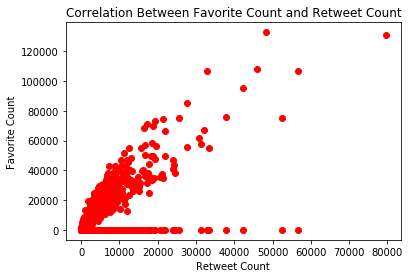

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns 
# To view the correlation between favorite count and retweet count
plt.scatter(df.retweet_count, df.favorite_count, color ='red');
plt.title('Correlation Between Favorite Count and Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

#### There is a positive correlation between likes and retweets. The more the likes on dog pictures the more they are likely to be retweeted

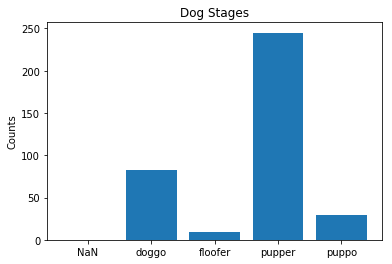

In [185]:
# To view the distributions of the dog stages
stage_list= ['NaN','doggo', 'floofer', 'pupper', 'puppo']
counts = [df.query('dog_stage == "NaN"').count()[0], df.query('dog_stage == "doggo"').count()[0], df.query('dog_stage == "floofer"').count()[0],
          df.query('dog_stage == "pupper"').count()[0], df.query('dog_stage == "puppo"').count()[0]]
ind = np.arange(1, 6)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
ax.set_xticklabels(stage_list);
ax.set_ylabel('Counts');
ax.set_title('Dog Stages');

#### We can see that puppo has the highest count followed by doggo 